In [772]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [773]:
# linear Regression

# y = wx+b
weight = 0.7
bias = 0.3
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias

In [774]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [775]:
len(X), len(y)

(50, 50)

In [776]:
X_train,y_train = (X[:int(0.8 * len(X))], (y[:int(0.8 * len(y))]))
X_test,y_test = (X[int(0.8 * len(X)):], (y[int(0.8 * len(y)):]))


In [777]:
len(X_train), len(y_train),len(X_test), len(y_test)

(40, 40, 10, 10)

In [778]:
def plot_predictions(
    x_train=X_train,
    y_train = y_train,
    x_test = X_test,
    y_test =y_test,
    prediction = None
):
    plt.figure(figsize=(10,7))
    plt.scatter(x_train,y_train,c="g",s=10,label="Training Data")
    # test data
    plt.scatter(x_test,y_test,c="b",s=5,label="Test Data")
    # plt.scatter(x_train,y_train)
    
    if prediction is not None:
        plt.scatter(x_test,prediction,c="y",s=5,label="Prediction Data")
        
    plt.legend()
    plt.show()

## Creating Models

To define a neural network in PyTorch, we create a class that inherits from nn.Module. 
We define the layers of the network in the __init__ function and specify how data will pass through the network in the forward function. 

#### nn.Module 

nn.Module is base class for all neural network modules.
Your models should also subclass this class.


In [779]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x):
        return self.weight * x + self.bias

In [780]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"

print(f"Using {device} device")

torch.manual_seed(42)
model_0 = LinearRegression().to(device)
print(model_0)
list(model_0.parameters())

Using cpu device
LinearRegression()


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [781]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Required_Grad 
Context-manager that disables gradient calculation.

Disabling gradient calculation is useful for inference, when you are sure that you will not call Tensor.backward(). 

It will reduce memory consumption for computations that would otherwise have requires_grad=True.
    
    >>> x = torch.tensor([1.], requires_grad=True)

    >>> with torch.no_grad():
    ...     y = x * 2
    >>> y.requires_grad
    False


    >>> @torch.no_grad()
    ... def doubler(x):
    ...     return x * 2
    >>> z = doubler(x)
    >>> z.requires_grad
    False


    >>> @torch.no_grad()
    ... def tripler(x):
    ...     return x * 3
    >>> z = tripler(x)
    >>> z.requires_grad
    False


    >>> # factory function exception
    >>> with torch.no_grad():
    ...     a = torch.nn.Parameter(torch.rand(10))
    >>> a.requires_grad
    True

In [782]:
x = torch.tensor(4.9,requires_grad=True)
print(x.requires_grad)

with torch.inference_mode():
    y = x+1
print(x.requires_grad)
print(y.requires_grad)

True
True
False


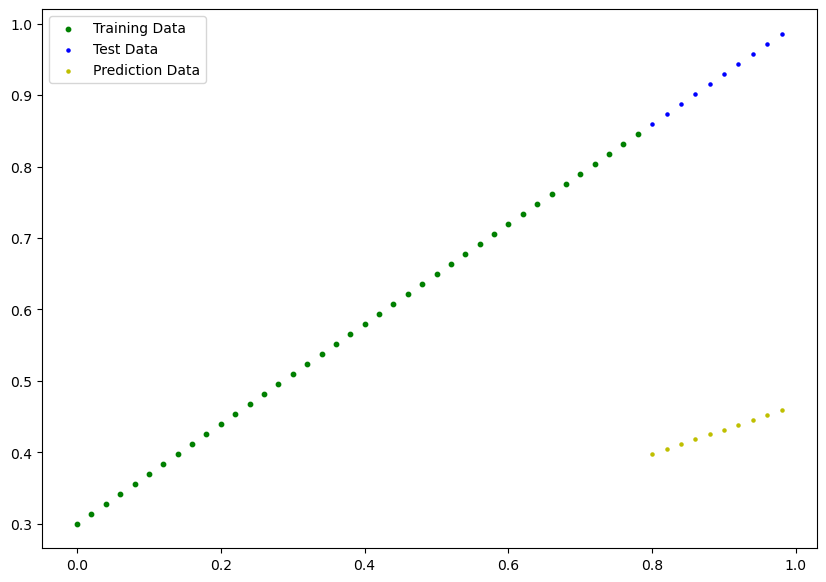

In [783]:
# Compute prediction error
# we know that we dont need the gradient descent to compute this time so we disable it by using no_grad
with torch.inference_mode():
    pred = model_0(X_test)
    

plot_predictions(prediction=pred)




## To train a model

In [784]:
# Optimizing the Model Paramet ers

# to train a model we need a loss function and optimizer
# loss function: loss function or cost function is used to measure how wrong our model predict the data
# optimizers are used to update the parameters of the model using gradient decenct to make them generalize for the data

# loss function
loss_fun = nn.L1Loss()

# Optimizer  Stochatic Gradient Descent 
optimizer  = torch.optim.SGD(model_0.parameters(),lr=0.01)


In PyTorch, optimizer.zero_grad() is a crucial method used within the training loop of a neural network. Its purpose is to reset the gradients of all parameters that the optimizer is tracking to None. 

In [785]:
epochs = 100
epochs_count = []
train_loss_value = []
test_loss_value = []

for epoch in range(epochs):
    model_0.train() 
   
    # forward pass
    y_pred = model_0(X_train)
    
    # loss/error of model
    loss = loss_fun(y_pred, y_train)
    print(f"Loss: {loss}")
     # Backpropagation
    loss.backward()
    optimizer.step()
    
    # this is important step
    optimizer.zero_grad() 
     
     
    #  testing mode
    
    model_0.eval()
    with torch.inference_mode():
    # with torch.no_grad()
        test_pred = model_0(X_test)
        test_loss = loss_fun(test_pred,X_test) 
        
        
    if epoch % 10 == 0:
        epochs_count.append(epoch)
        test_loss_value.append(test_loss)
        train_loss_value.append(loss)
        
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        print(model_0.state_dict(),"\n\n")
    
    
    
    

Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.4480651915073395
OrderedDict({'weight': tensor([0.3406]), 'bias': tensor([0.1388])}) 


Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3133552074432373
OrderedDict({'weight': tensor([0.3796]), 'bias': tensor([0.2388])}) 


Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.18429657816886902
OrderedDict({'weight': tensor([0.4184]), 'bias': tensor([0.3333])}) 


Loss: 0.08227583020925522
Loss: 0.076388

In [786]:
with torch.inference_mode():
    # with torch.no_grad()
    new_pred = model_0(X_test)
    # test_loss = loss_fun(new_pred,X_test) 
        

In [787]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])

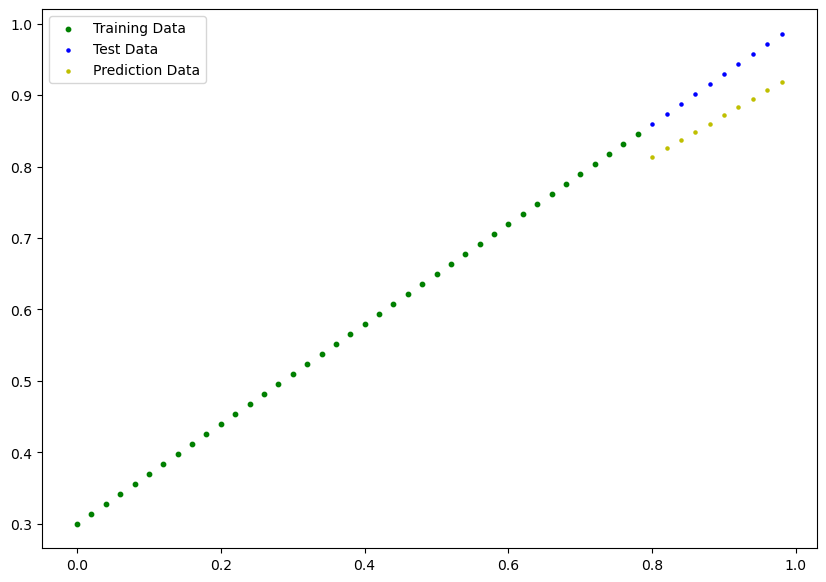

In [788]:
plot_predictions(prediction=new_pred)

In [789]:
test_loss_value

[tensor(0.4481),
 tensor(0.3134),
 tensor(0.1843),
 tensor(0.1116),
 tensor(0.0806),
 tensor(0.0662),
 tensor(0.0559),
 tensor(0.0476),
 tensor(0.0396),
 tensor(0.0333)]

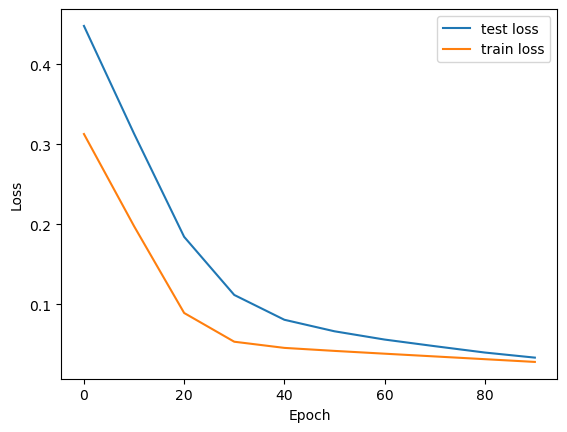

In [790]:
plt.plot(epochs_count,np.array(test_loss_value) ,label="test loss")
plt.plot(epochs_count,torch.tensor(train_loss_value).cpu().numpy() ,label="train loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

## Saving Models 
when it come to saving and loading of models, there are three core functions to be familiar with 

+ `torch.save`
+ `torch.load`
+ `torch.nn.Module.load_state_dict`

<img src="./Screenshot from 2025-07-07 13-55-32.png" height="400px" width="700px"/>

In [791]:
from pathlib import Path
model_path = Path('models')
model_path.mkdir(parents=True, exist_ok=True)

model_name = "linearRegression_model_0.pth"
model_save_path = model_path / model_name


model_save_path

PosixPath('models/linearRegression_model_0.pth')

In [792]:
# save 
torch.save(model_0.state_dict(),model_save_path)
print(f"Saved Pytorch Model State to {model_save_path}")

Saved Pytorch Model State to models/linearRegression_model_0.pth


In [793]:
model_0 = LinearRegression().to(device)
model_0.load_state_dict(torch.load(model_save_path,weights_only=True))


<All keys matched successfully>

In [794]:
# save entire model 
# torch.save(model_0,"model.pth")
# model = torch.load("model.pth", weights_only=False)
# model.eval()
# with torch.inference_mode():
#     load_model_pred = model(X_test)



In [795]:
model_0.eval()
with torch.inference_mode():
    load_model_pred = model_0(X_test)

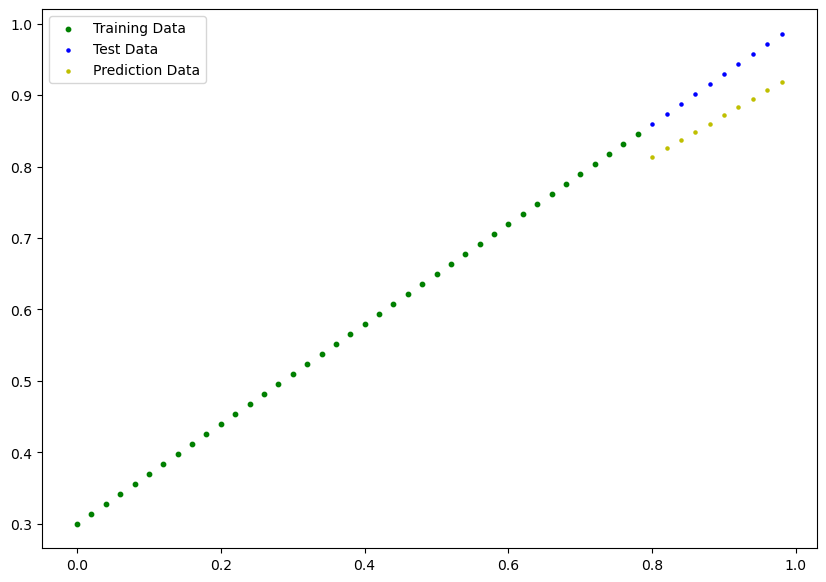

In [796]:
plot_predictions(prediction=load_model_pred)

In [797]:
# model prediction before and after loading of save parameters
new_pred == load_model_pred 

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putthing It All Together

In [798]:
import torch 
from torch import nn
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cpu'

In [799]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [800]:
# data creatiion 
weight = 0.7
bias  = 0.3
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias
len(X), len(y)



(50, 50)

In [801]:
# splitting of data  80% training and 20% test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,shuffle=False)

In [802]:
def plot_predictions(
    x_train=X_train,
    y_train = y_train,
    x_test = X_test,
    y_test =y_test,
    prediction = None
):
    plt.figure(figsize=(10,7))
    plt.scatter(x_train,y_train,c="g",s=10,label="Training Data")
    # test data
    plt.scatter(x_test,y_test,c="b",s=5,label="Test Data")
    # plt.scatter(x_train,y_train)
    
    if prediction is not None:
        plt.scatter(x_test,prediction,c="red",s=5,label="Prediction Data")
        
    plt.legend()
    plt.show()

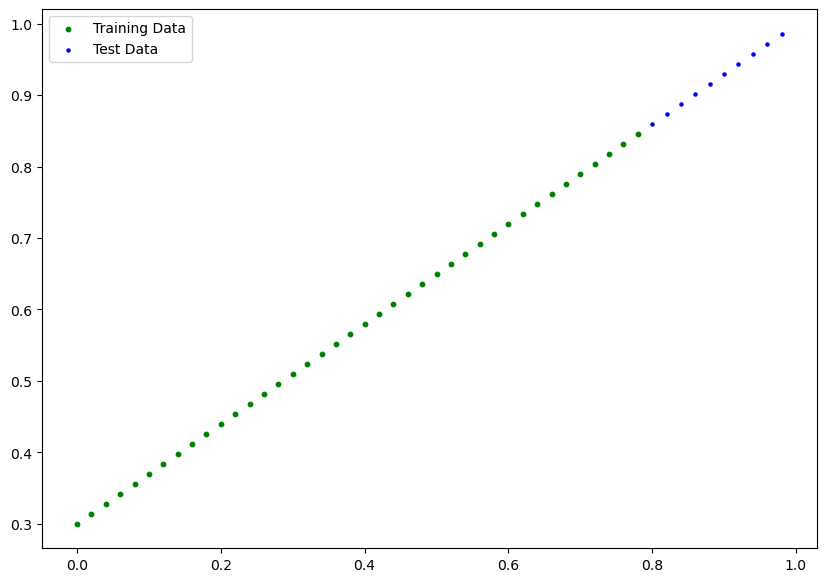

In [803]:
plot_predictions(X_train,y_train,X_test,y_test)

## Building a Pytorch Linear Model

nn.Linear in PyTorch are fully connected layers (also called dense layers), and yes, they are conceptually the same—they apply a linear transformation to the input data:

In [841]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1,out_features=1)
    
    def forward(self, x):
        x= self.linear(x)
        return x

In [842]:
torch.manual_seed(42)
model_1 = LinearRegressionModel().to(device)
model_1.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]])),
             ('linear.bias', tensor([0.8300]))])

In [843]:
next(model_1.parameters()).device

device(type='cpu')

### Model Train

In [844]:
# To train a model, we need a loss function and an optimizer.

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_1.parameters(),lr=0.01)

In [845]:
epochs = 100

for epoch in range(epochs):
    # in training mood which is help for dropout and batchNorm Layers etc
    model_1.train()
    
    # forward pass/Compute prediction error
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred,y_train)
    print(f"loss: {loss}")
    # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    
    # testing mode
    model_1.eval()
    
    with torch.inference_mode():
        y_test_pred =  model_1(X_test)
        test_loss = loss_fn(y_test_pred,y_test)
    
    
    if epoch % 10 == 0:
        print(f"loss: {loss} | test_loss: {test_loss}")
    
    
    
    
    
    
    
    
    

loss: 0.5551779866218567
loss: 0.5551779866218567 | test_loss: 0.5739762187004089
loss: 0.5436569452285767
loss: 0.5321359634399414
loss: 0.5206149816513062
loss: 0.5090939998626709
loss: 0.49757298827171326
loss: 0.4860519766807556
loss: 0.47453099489212036
loss: 0.4630100131034851
loss: 0.45148906111717224
loss: 0.4399680495262146
loss: 0.4399680495262146 | test_loss: 0.4392663538455963
loss: 0.42844706773757935
loss: 0.41692614555358887
loss: 0.4054051339626312
loss: 0.3938841223716736
loss: 0.38236314058303833
loss: 0.3708421289920807
loss: 0.35932114720344543
loss: 0.34780019521713257
loss: 0.3362792134284973
loss: 0.3247582018375397
loss: 0.3247582018375397 | test_loss: 0.30455657839775085
loss: 0.31323719024658203
loss: 0.3017162084579468
loss: 0.2901952564716339
loss: 0.27867424488067627
loss: 0.2671532928943634
loss: 0.2556322515010834
loss: 0.24411126971244812
loss: 0.23259028792381287
loss: 0.2210693061351776
loss: 0.20954827964305878
loss: 0.20954827964305878 | test_loss: 0

In [ ]:
model_1.eval() # we have to turn the model to the eval model for the prediction it deactive the dropout layer and batchNorm layer of the model
with torch.inference_mode():
    y_new_pred = model_1(X_test)
    

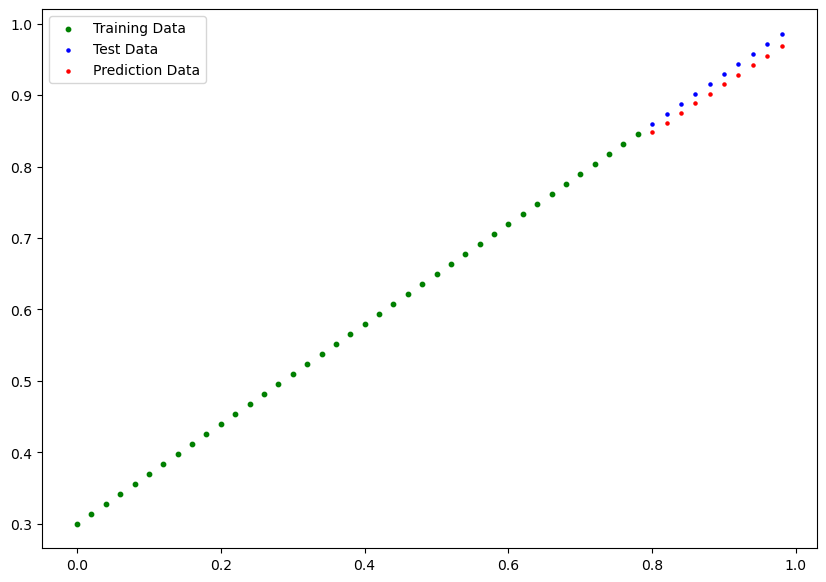

In [847]:
plot_predictions(prediction=y_new_pred)

In [848]:
model_1.state_dict()

OrderedDict([('linear.weight', tensor([[0.6691]])),
             ('linear.bias', tensor([0.3130]))])

In [849]:
# saving of the model 
model_name = "model_1_linearregression.pth"
model_save_path = model_path / model_name
model_save_path

PosixPath('models/model_1_linearregression.pth')

In [850]:
torch.save(obj=model_1.state_dict(),f=model_save_path)

In [863]:
# loading of model 

model_1_loaded = LinearRegressionModel()
model_1_loaded.load_state_dict(torch.load(model_save_path,weights_only=True))
model_1_loaded.state_dict()

OrderedDict([('linear.weight', tensor([[0.6691]])),
             ('linear.bias', tensor([0.3130]))])

In [864]:
model_1_loaded.eval()
with torch.inference_mode():
    load_y_pred = model_1_loaded(X_test)

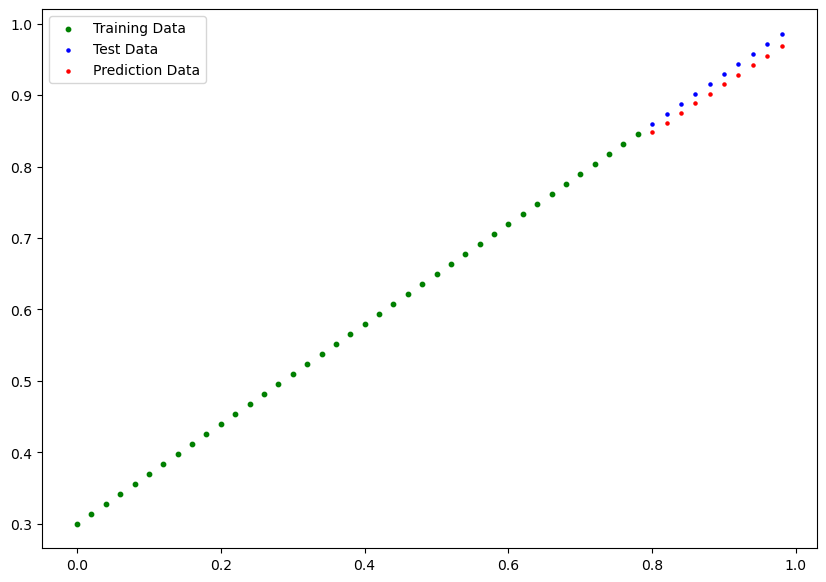

In [865]:
plot_predictions(prediction=load_y_pred)